<img src="..\..\assets\maco7.png" align="left" style='width:1000px'/>
 
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>

<h1>Tutorial : dataset structuration</h1><hr style="border-width:2px;border-color:black">



<span>
    This notebook shows how to build the dataset before training. It details the different pre-processing steps to come up with a mix of composed images and taco images with chosen classes.
</span>

<ol>
    <li> Compose images of two classes  </li>
    <li> Select a few classes to build a light taco dataset</li>
    <li> Merge the two datasets in a single one</li>
    <li> Imbalanced data : resampling dataset</li>
    <li> Split the final dataset into train/val/test sets</li>
</ol>

In [138]:
import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import pycocotools.coco

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

sys.path.append(ROOT_DIR)  # To find local version of the library
import src.mrcnn.utils
import src.mrcnn.visualize
from src.mrcnn.visualize import display_images
import src.mrcnn.model as modellib
from src.mrcnn.config import Config
from src.mrcnn.model import log
import seaborn as sns
import pandas as pd
from src.mrcnn import visualize
from src.mrcnn.config_taco import TacoConfig, CocoLikeDataset

%matplotlib inline

def load_dataset(json_path,image_dir):
    config = TacoConfig()
    dataset = CocoLikeDataset()
    dataset.load_data(json_path, image_dir)
    # Must call before using the dataset
    dataset.prepare()
    print("Class Count: {}".format(dataset.num_classes))
    for i, info in enumerate(dataset.class_info):
        print("{:3}. {:50}".format(i, info['name']))
    return dataset

# 1. Compose images (two classes)

We will compose 1000 images of size 512x512 where foreground images belong to two categories : Covid Mask and Cigarette.

In [ ]:
%run python.exe ../src/coco_assistant/cv_image_composition.py --input_dir="./datasets/trash_composition" --output_dir="./datasets/trash_generated" --count=1000 --width=512 --height=512

We build the dedicated annotation file:

In [ ]:
%run python.exe ../src/coco_assistant/coco_json_annotations.py --dataset_info=..\datasets\trash_generated\dataset_info.json --mask_definition=..\datasets\trash_generated\mask_definitions.json

# 2. Build a light taco dataset
The TACO dataset at the time we have downloaded it has 60 classes. We have selected the following classes among those which are best represented:
<ul>
    <li>Plastic film</li>
     <li>Clear plastic bottle</li>
     <li>Drink can</li>
     <li>Cigarette</li>
     <li>Plastic bottle cap</li>
     <li>Broken glass</li>
</ul>

In [ ]:
%run python.exe ../src/coco_assistant/coco_merge_remove.py keep --output_dir=./datasets/taco_light

In [130]:
TACO_DIR = os.path.join(ROOT_DIR, "datasets/taco_light")
json_path = os.path.join(TACO_DIR, "kept/coco_annotations_taco.json")
# json_path = os.path.join(TACO_DIR, "annotations/coco_annotations_taco.json")
img_dir = os.path.join(TACO_DIR, "images")
with open(json_path, 'r') as f:
    dataset = json.loads(f.read())
for cate in dataset["categories"]:
    print("{:3}.{:25}. {:30}".format(cate['id'],cate['supercategory'], cate['name']))

  1.Plastic bag & wrapper    . Plastic film                  
  2.Bottle                   . Clear plastic bottle          
  3.Bottle cap               . Plastic bottle cap            
  4.Broken glass             . Broken glass                  
  5.Can                      . Drink can                     
  6.Cigarette                . Cigarette                     


loading annotations into memory...
Done (t=0.50s)
creating index...
index created!
F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000336.jpg


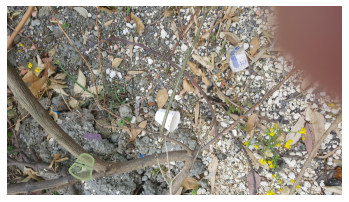

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00001138.JPG


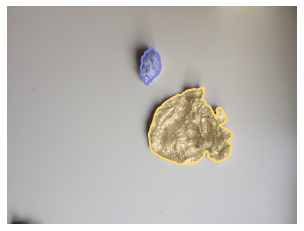

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000082.JPG


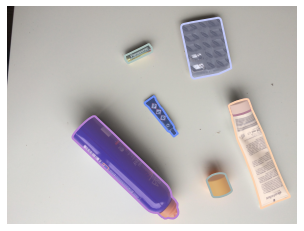

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000456.jpg


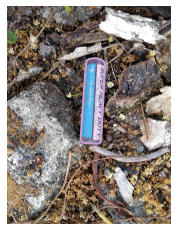

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000329.jpg


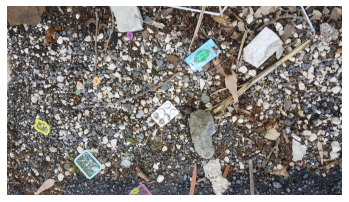

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000337.jpg


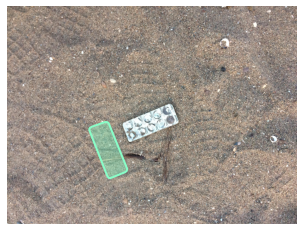

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000367.jpg


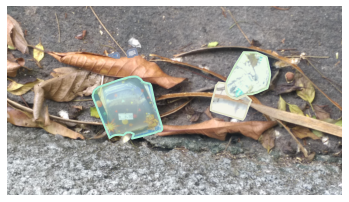

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000367.jpg


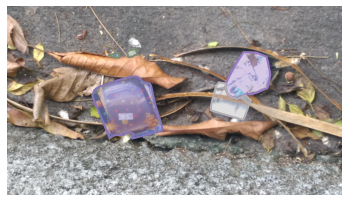

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00001347.jpg


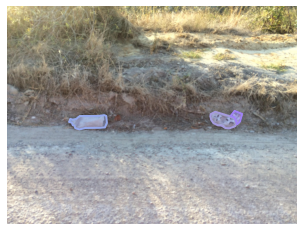

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000229.jpg


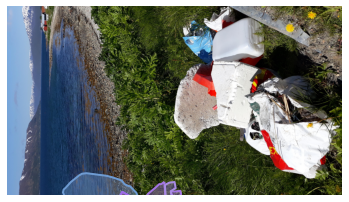

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000076.JPG


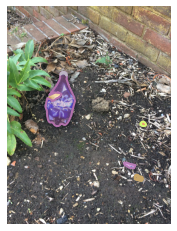

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000076.JPG


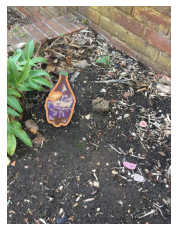

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00001494.jpg


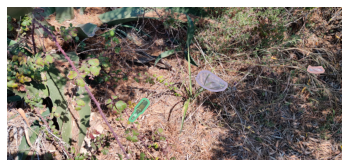

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000192.jpg


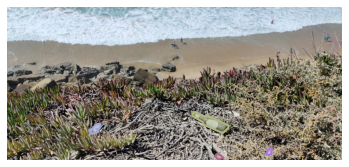

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000380.jpg


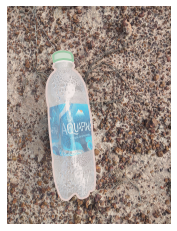

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000931.JPG


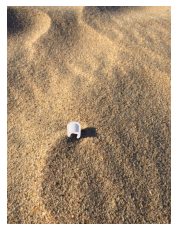

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000741.JPG


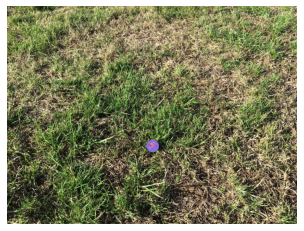

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000094.JPG


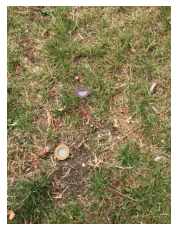

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00001365.jpg


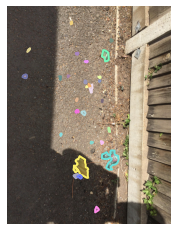

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000064.JPG


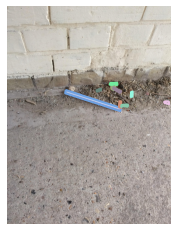

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00001359.jpg


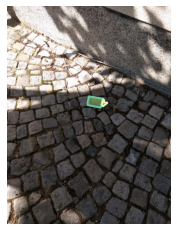

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000033.jpg


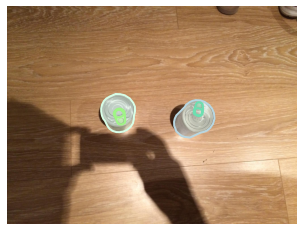

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000035.jpg


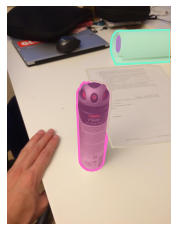

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000800.JPG


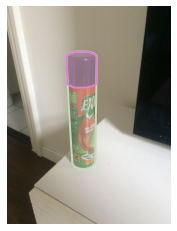

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00001276.JPG


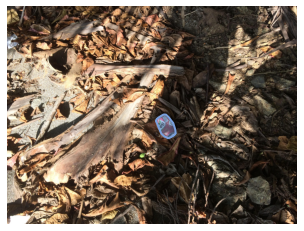

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00001328.jpg


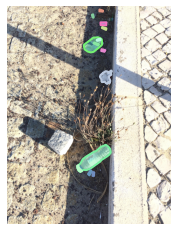

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000035.jpg


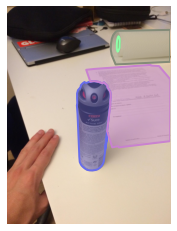

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000084.JPG


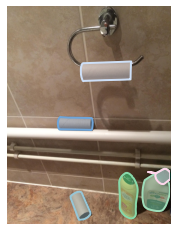

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000518.jpg


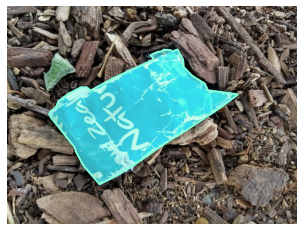

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000410.jpg


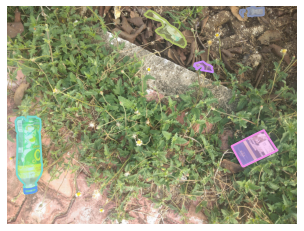

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000127.jpg


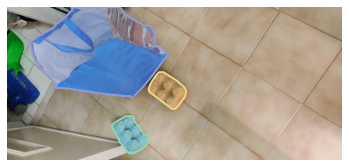

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000048.JPG


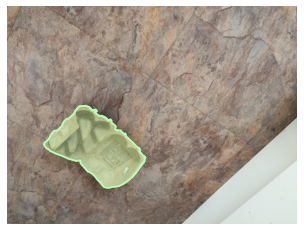

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000449.jpg


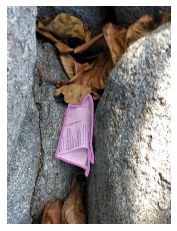

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00001257.JPG


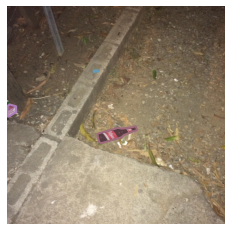

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000745.JPG


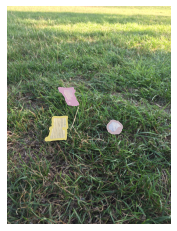

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000455.jpg


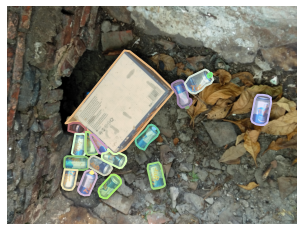

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00001159.JPG


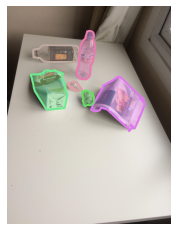

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000387.jpg


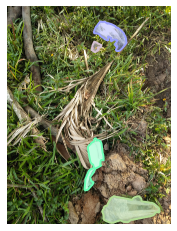

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000212.jpg


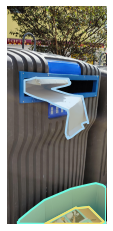

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00001215.JPG


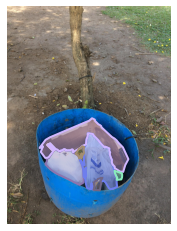

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00001070.JPG


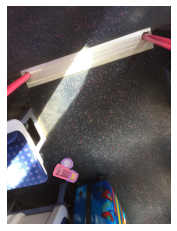

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00001202.JPG


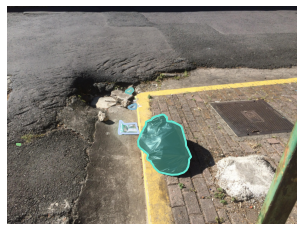

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00001302.jpg


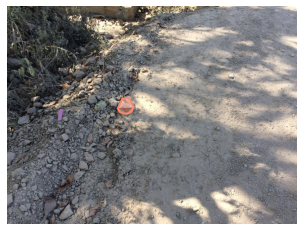

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000502.jpg


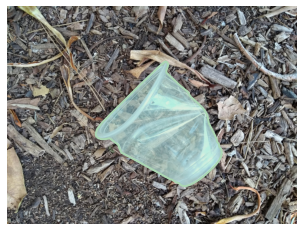

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000079.JPG


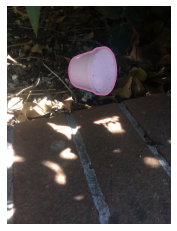

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000460.jpg


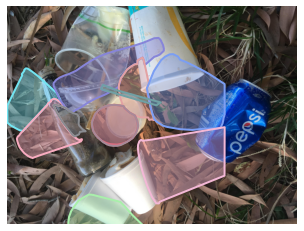

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000112.jpg


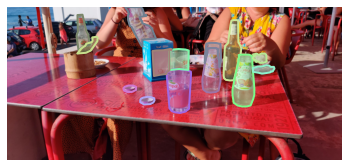

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000112.jpg


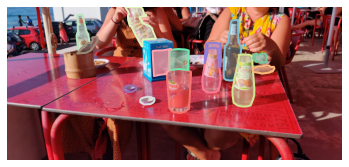

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000901.JPG


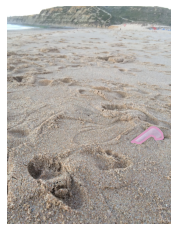

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000901.JPG


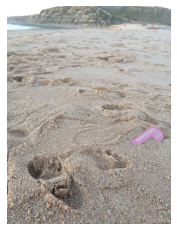

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000081.JPG


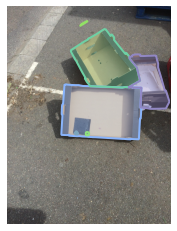

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000092.JPG


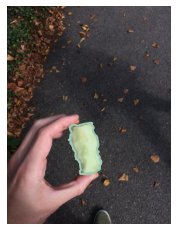

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000838.JPG


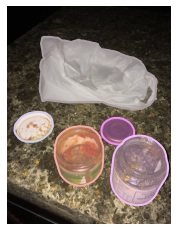

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000838.JPG


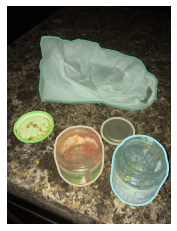

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00001036.JPG


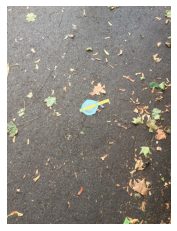

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000187.jpg


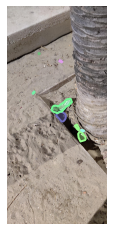

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000797.JPG


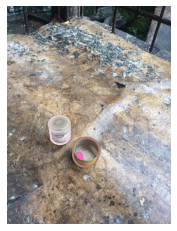

F:\Deep_Learning\MACO-inspired-by-taco\datasets/taco_light\images\00000839.JPG


KeyboardInterrupt: 

In [125]:
coco = pycocotools.coco.COCO(json_path)

for cate_id in coco.getCatIds():
    list_images = coco.getImgIds(catIds=[cate_id])
    sample_images = np.random.choice(list_images, 2)
    ann_images = coco.loadImgs(ids=sample_images)

    #  loop on images
    for ann_img in ann_images:
        plt.cla()
        # image path
        img_path = os.path.join(img_dir,ann_img['file_name'])
        print(img_path)
        I = plt.imread(img_path)
        # load and display instance annotations
        plt.imshow(I); plt.axis('off')
        # get annotation ids of the images
        annIds = coco.getAnnIds(imgIds=ann_img['id'], iscrowd=None)
        # load annotations
        anns = coco.loadAnns(annIds)
        coco.showAnns(anns)

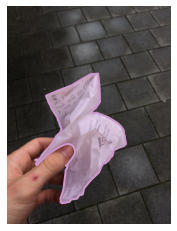

Class Count: 7
  0. BG                                                
  1. Plastic film                                      
  2. Clear plastic bottle                              
  3. Plastic bottle cap                                
  4. Broken glass                                      
  5. Drink can                                         
  6. Cigarette                                         


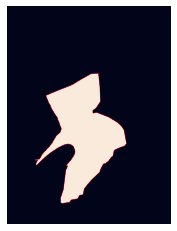

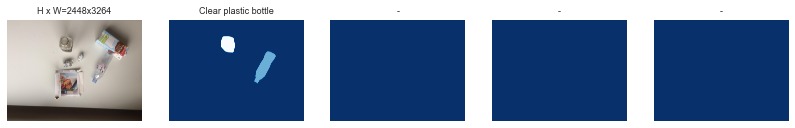

In [149]:
TACO_DIR = os.path.join(ROOT_DIR, "datasets/taco_light")
json_path = os.path.join(TACO_DIR, "kept/coco_annotations_taco.json")
img_dir = os.path.join(TACO_DIR, "images")

ann_img = coco.loadImgs(ids=[58])
plt.cla()
# image path
img_path = os.path.join(img_dir,ann_img[0]['file_name'])
I = plt.imread(img_path)
# load and display instance annotations
plt.imshow(I); plt.axis('off')
# get annotation ids of the images
annIds = coco.getAnnIds(imgIds=ann_img[0]['id'], iscrowd=None)
# load annotations
anns = coco.loadAnns(annIds)
coco.showAnns(anns)
plt.show()

mask = coco.annToMask(anns[0])
for i in range(len(anns)):
    mask += coco.annToMask(anns[i])
plt.axis('off')
plt.imshow(mask)

# # Load and display random samples
dataset = load_dataset(json_path,img_dir)
# image_ids = np.random.choice(dataset.image_ids, 4)
for image_id in [580]:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

# 3. Merge the two datasets into a single one


In [ ]:
%run python.exe ../src/coco_assistant/coco_merge_remove.py merge --output_dir=./datasets/taco_final

In [135]:
TACO_DIR = os.path.join(ROOT_DIR, "datasets/taco_final/merged")
json_path = os.path.join(TACO_DIR, "annotations/coco_merged.json")
image_dir = os.path.join(TACO_DIR, "images")
with open(json_path, 'r') as f:
    json_ann = json.loads(f.read())
for cate in json_ann["categories"]:
    print("{:3}.{:25}. {:30}".format(cate['id'],cate['supercategory'], cate['name']))

  1.plastic bag & wrapper    . plastic film                  
  2.bottle                   . clear plastic bottle          
  3.bottle cap               . plastic bottle cap            
  4.broken glass             . broken glass                  
  5.can                      . drink can                     
  6.cigarette                . cigarette                     
  7.mask                     . mask                          


In [136]:
dataset = load_dataset(json_path,image_dir)

Class Count: 8
  0. BG                                                
  1. plastic film                                      
  2. clear plastic bottle                              
  3. plastic bottle cap                                
  4. broken glass                                      
  5. drink can                                         
  6. cigarette                                         
  7. mask                                              


# 4. Imbalanced data

## 4.1 Visualization of the class balance

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


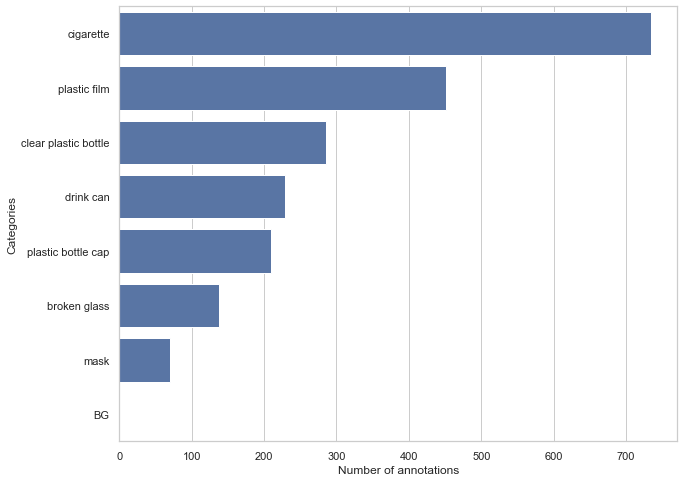

In [140]:
def category_balance(dataset,json_path):
    coco = pycocotools.coco.COCO(json_path)
    # Count annotations
    cat_histogram = np.zeros(dataset.num_classes,dtype=int)
    class_names = []
    for i, info in enumerate(dataset.class_info):
        ann_per_cat = coco.getAnnIds(catIds=i, iscrowd=None)
        cat_histogram[i] = len(ann_per_cat)
        class_names.append(info['name'])

    # Initialize the matplotlib figure
    _, ax = plt.subplots(figsize=(10,1*dataset.num_classes))

    # Convert to DataFrame
    d ={'Categories': class_names, 'Number of annotations': cat_histogram}
    df = pd.DataFrame(d)
    df = df.sort_values(by=['Number of annotations'], axis=0, ascending=False)

    # Plot the histogram
    sns.set_color_codes("pastel")
    sns.set(style="whitegrid")
    plot_1 = sns.barplot(x="Number of annotations", y="Categories", data=df,
                label="Total", color="b", orient="h")

    fig = plot_1.get_figure()
category_balance(dataset,json_path)

## 4.2 Resampling

In [ ]:
%run python.exe ../src/coco_assistant/coco_merge_remove.py sampling --output_dir=./datasets/taco_final --sampling_value=400

In [5]:
json_path_sampling = os.path.join(TACO_DIR, "sampling/coco_annotations_taco.json")
dataset_sampling = load_dataset(json_path_sampling,image_dir)

Class Count: 7
  0. BG                                                
  1. Plastic film                                      
  2. Clear plastic bottle                              
  3. Plastic bottle cap                                
  4. Broken glass                                      
  5. Drink can                                         
  6. Cigarette                                         


loading annotations into memory...
Done (t=0.10s)
creating index...
index created!


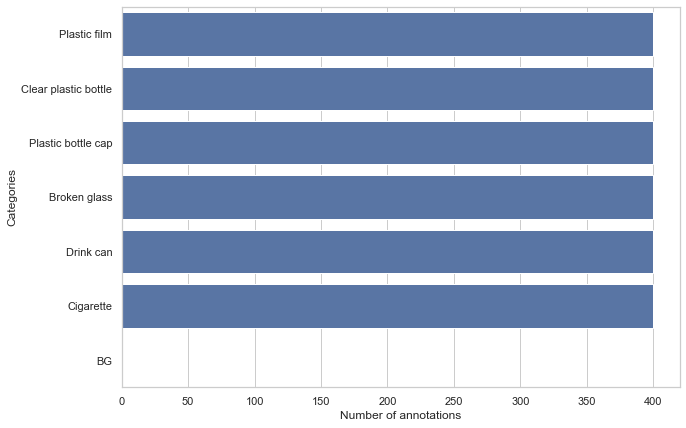

In [137]:
category_balance(dataset_sampling,json_path_sampling)

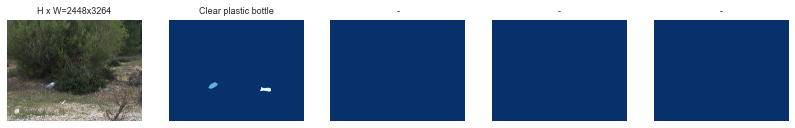

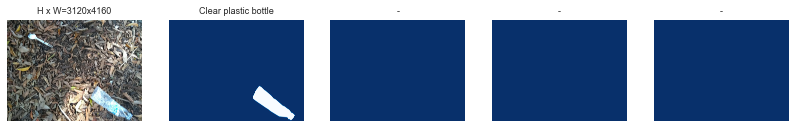

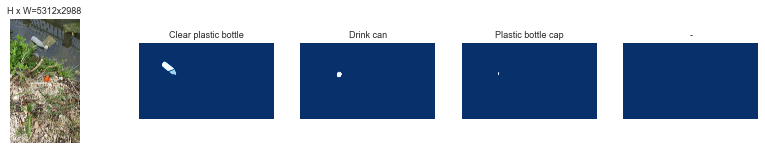

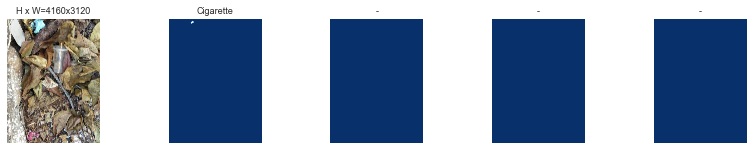

In [7]:
# Load and display random samples
image_ids = np.random.choice(dataset.image_ids, 4)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

# 5. Split dataset

In [ ]:
%run python.exe ../src/coco_assistant/split_dataset.py --image_dir=..\datasets\taco_final\sampling\images --output_dir=..\datasets\taco_split --json_file=F:\Deep_Learning\Mask-RCNN-inspired-by-taco\datasets\taco_final\sampling\coco_merged.json

In [148]:
import glob
print("Image directory structure:")
for f in glob.glob("../../datasets/taco_split/images/*", recursive=True):
    print(f)
print("Annotation files:")
for f in glob.glob("../../datasets/taco_split/annotations/*", recursive=True):
    print(f)

Image directory structure:
../../datasets/taco_split/images\test
../../datasets/taco_split/images\train
../../datasets/taco_split/images\val
Annotation files:
../../datasets/taco_split/annotations\coco_annotations_test.json
../../datasets/taco_split/annotations\coco_annotations_train.json
../../datasets/taco_split/annotations\coco_annotations_val.json
